## 从MongoDB中读取数据

In [355]:
import pymongo
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']#设置绘制图形中文的正常显示
plt.rcParams['axes.unicode_minus']=False#设置负号的正常显示
client = pymongo.MongoClient('localhost',27017)#连接MangoDB
db  = client['dangdang']#获取dangdang数据库中的内容
pk10 = db['book']#获取book表单内容，即保存的内容
data = pd.DataFrame(list(pk10.find()))
data=data.drop(data.columns[0],axis=1)#删除导出的第一列id信息（无用信息，为保存进数据库后自动生成的）
data.head()

,name,author,price,comments,category
0,皮囊（350万册纪念版。直面人生的终极问题，刻在骨头里的故事，容纳一个个既失去家乡又未到达...,蔡崇达，果麦文化 出品,¥41.50,897433条评论,文学
1,诗经（韩寒推荐，全三册注音插图版）,骆玉明(解注)，果麦文化 出品,¥115.00,126380条评论,文学
2,后来时间都与你有关（肖战李现同款书，韩寒 何炅 谢娜 吴昕 戚薇 阚清子等明星推荐）,张皓宸，果麦文化 出品,¥36.20,252254条评论,文学
3,鲁迅文集精选（全六册）,鲁迅，果麦文化 出品,¥147.00,201078条评论,文学
4,戴建业 精读世说新语（2019全新升级版，超千万人点赞，10小时狂销4000册！陈引驰、骆...,戴建业， 果麦文化 出品,¥56.70,18672条评论,文学


## 数据预处理

In [357]:
#数据预处理
'''
1、将作者列后面的出版社信息删除
2、将价格中的人民币符号去掉,将数值类型转换为浮点数
3、将评论数的文字删掉，将数值类型转换为整数
    （注：评论数即对应书的销量，没有评论的用户系统默认给与好评，也算在了评论之中）
'''
for i in range(len(data)):#实现1
    author_list=data.author[i].split('，')
    if(len(author_list)>1):
        data.author[i]=author_list[:-1]
    data.author[i]=''.join(data.author[i])
    
for i in range(len(data)):#实现2、3
    #data['author'][i]=data['author'][i].split('，')[0]#将内容用逗号分隔，取分隔后的第一部分
    data['price'][i]=float(data['price'][i].replace('¥',''))#将符号替换为空
    data['comments'][i]=int(data['comments'][i].replace('条评论',''))#将‘条评论’替换成空
data.head()

,name,author,price,comments,category
0,皮囊（350万册纪念版。直面人生的终极问题，刻在骨头里的故事，容纳一个个既失去家乡又未到达...,蔡崇达,41.5,897433,文学
1,诗经（韩寒推荐，全三册注音插图版）,骆玉明(解注),115,126380,文学
2,后来时间都与你有关（肖战李现同款书，韩寒 何炅 谢娜 吴昕 戚薇 阚清子等明星推荐）,张皓宸,36.2,252254,文学
3,鲁迅文集精选（全六册）,鲁迅,147,201078,文学
4,戴建业 精读世说新语（2019全新升级版，超千万人点赞，10小时狂销4000册！陈引驰、骆...,戴建业,56.7,18672,文学


## 可视化分析

([<matplotlib.patches.Wedge at 0x18fa342c940>,
 [Text(1.5999620934969316, 0.01101359945324222, '中小学教辅'),
  Text(1.299564777518896, 0.03363612689152332, '套装'),
  Text(1.0825057291862883, 0.1954004766597629, '社科'),
  Text(0.9767593659028915, 0.5059062572463219, '经典'),
  Text(0.7252765355099291, 0.8270271743048802, '励志'),
  Text(0.1357914387804822, 1.0915863159429615, '少儿'),
  Text(-0.9518260043184033, 0.5513866678686229, '小说'),
  Text(0.14396320958458256, -1.0905386716142191, '文学')],
 [Text(1.0999739392791403, 0.0075718496241040266, '0.2%'),
  Text(0.7997321707808589, 0.020699155010168196, '0.4%'),
  Text(0.5904576704652481, 0.10658207817805247, '4.5%'),
  Text(0.5327778359470317, 0.2759488675889028, '5.1%'),
  Text(0.3956053830054158, 0.4511057314390255, '6.8%'),
  Text(0.07406805751662664, 0.5954107177870698, '12.2%'),
  Text(-0.5191778205373109, 0.30075636429197605, '25.1%'),
  Text(0.07852538704613593, -0.5948392754259376, '45.8%')])

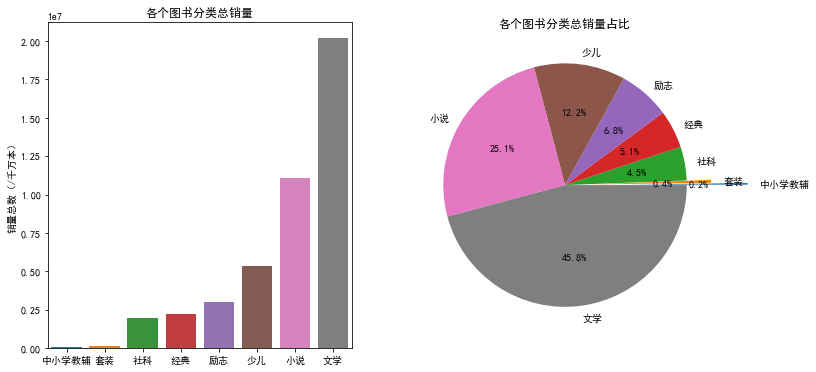

In [349]:
categories=data['category'].drop_duplicates().tolist()#获取所有分类信息
category_counts=[]#每种分类的总体销量
for i in categories:
    category_counts.append(data.loc[data['category']==i,'comments'].sum())
category=dict(zip(categories,category_counts))#将上述两个字段合并成一个字典
category=dict(sorted(category.items(),key=lambda k:(k[1],k[0])))#将字典排序

plt.figure(figsize=(12,6))#设置绘图的画布大小
plt.subplot(121)#设置第一个子图的画布（一行两列第一个图）
plt.title("各个图书分类总销量")
plt.ylabel("销量总数（/千万本）")
sns.barplot(x=list(category.keys()),y=list(category.values()))

plt.subplot(122)#绘制第二个子图
indic = []
#我们将数据最大的突出显示
for value in range(len(category)):
    if(value==0):
        indic.append(0.5)
    elif(value==1):
        indic.append(0.2)
    else:
        indic.append(0)
plt.title("各个图书分类总销量占比")
plt.pie(
    category.values(),#要绘制的数据
    labels=category.keys(),#数据标签
    explode=indic,#每一块数据的间隔
    autopct='%1.1f%%'#数据百分比显示保留一位小数
)


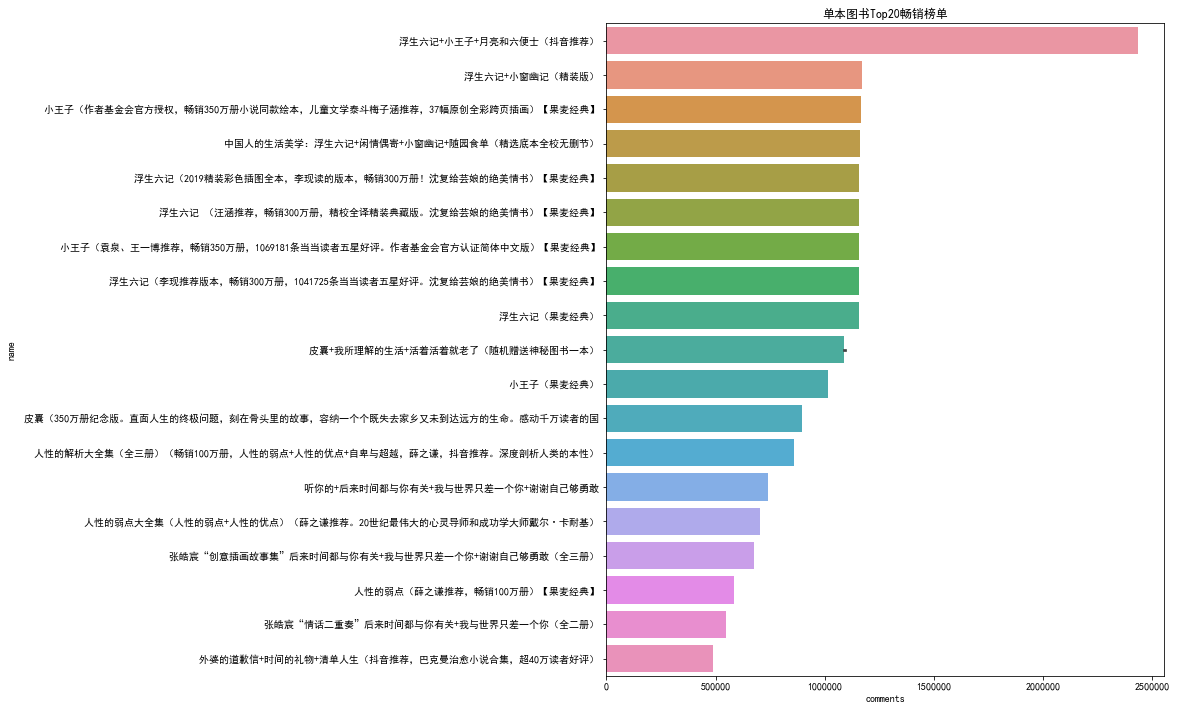

In [341]:
plt.figure(figsize=(10,12))
top=data.sort_values(by=['comments'],ascending=False).iloc[0:20]
plt.title("单本图书Top20畅销榜单")
sns.barplot(y='name',x='comments',data=top)

[Text(0.5, 0, '销量（/千万本)'), Text(0.5, 1.0, '畅销作家Top10')]

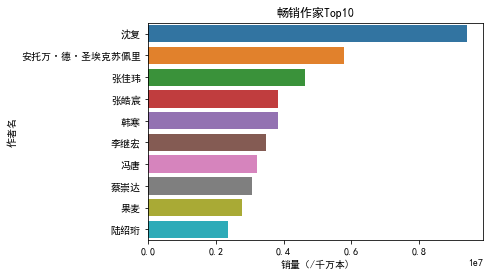

In [373]:
import re
unique=[]
sales=[]
invalid=['[苏]','[美]','译者','译','(法)','[法]','著','编']
for i in data['author']:
    i=re.split('，|、| ',i)
    for j in i:
        if j not in unique and j not in invalid:
            unique.append(j)
delete=[]
for name in unique:
    try:
        sum_all=data[data['author'].str.contains(name)]['comments'].sum()
        sales.append(sum_all)
    except:
        index=unique.index(name)
        delete.append(name)
for i in delete:
    unique.remove(i)
Author=pd.DataFrame({
    '作者名':unique,
    '销量':sales
})
Author=Author.sort_values(by='销量',ascending=False)
Author=Author.drop([50,979],axis=0)
ax=sns.barplot(x=Author.iloc[0:10]['销量'],y=Author.iloc[0:10]['作者名'])
ax.set(xlabel='销量（/千万本)',title='畅销作家Top10')